# Dataset - clothing style

# Objective:-

We use Association rule mining for clothing style recommendation. Association rules are useful for analyzing and predicting customer behavior.In this dataset we use association rule to find the best clothing option for people. So that we can recommend other people to look for same clothing style. This pattern would help cloths designers to understand the choice of people so that they can make more  design on that genre which would help them to earn more gross.

# Dataset Description:

These files contain around 44000 list of clothing for both male and female in the Dataset. The dataset consists of clothing style till 2017  

Data points include:-

Gender
Master category
Sub category
Article Type
Base Colour
Season
Year
Usage
Product Display Name

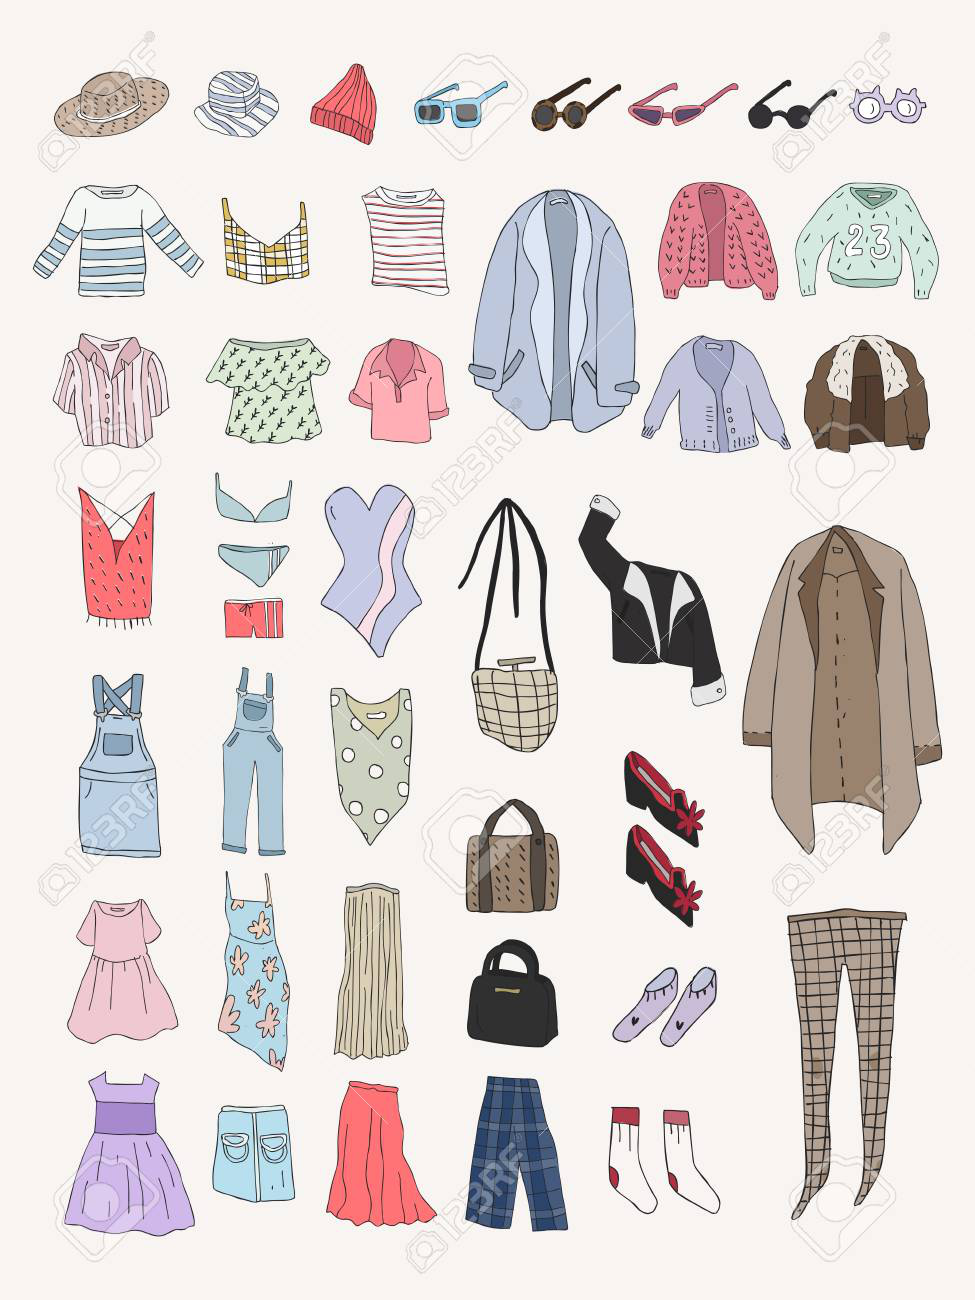

In [13]:
from PIL import Image
Image.open('cc.jpg')

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
dataset=pd.read_csv("~/Desktop/styles.csv",error_bad_lines=False,) 


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [44]:
dataset = dataset.iloc[0:2000]
dataset


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
1995,8175,Women,Footwear,Shoes,Heels,Brown,Winter,2015.0,Casual,Catwalk Women Casual Brown Flats
1996,7901,Men,Apparel,Topwear,Tshirts,Cream,Fall,2011.0,Casual,Proline Men's Printed Chalk Cream Brown T-shirt
1997,19522,Men,Apparel,Topwear,Sweaters,Navy Blue,Fall,2011.0,Casual,United Colors of Benetton Men Check Navy Blue ...
1998,13018,Women,Footwear,Shoes,Heels,Black,Winter,2012.0,Casual,Inc 5 Women Casual Black Flats


# Data Preprocessing

In [45]:
# check null values
dataset.isnull().sum()

id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             0
season                 1
year                   0
usage                 20
productDisplayName     0
dtype: int64

In [46]:
# check datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2000 non-null   int64  
 1   gender              2000 non-null   object 
 2   masterCategory      2000 non-null   object 
 3   subCategory         2000 non-null   object 
 4   articleType         2000 non-null   object 
 5   baseColour          2000 non-null   object 
 6   season              1999 non-null   object 
 7   year                2000 non-null   float64
 8   usage               1980 non-null   object 
 9   productDisplayName  2000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB



# EDA

Bar Graph of sub category

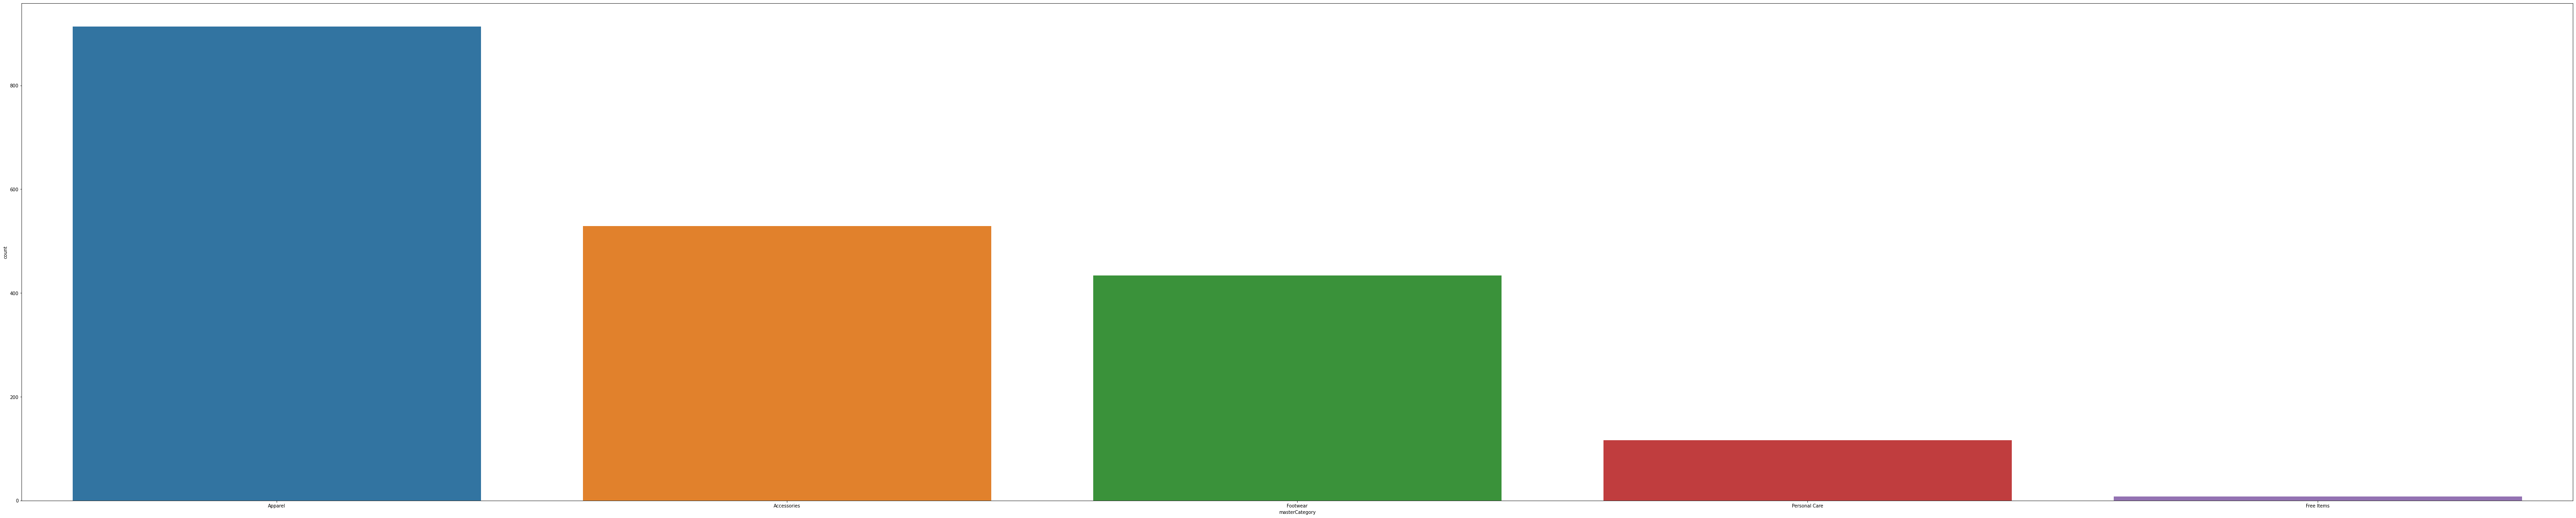

In [49]:
fig = plt.figure(figsize=(100,20))
sns.countplot(x= "masterCategory", data=dataset)

Boxplot graph betwwen year and gender

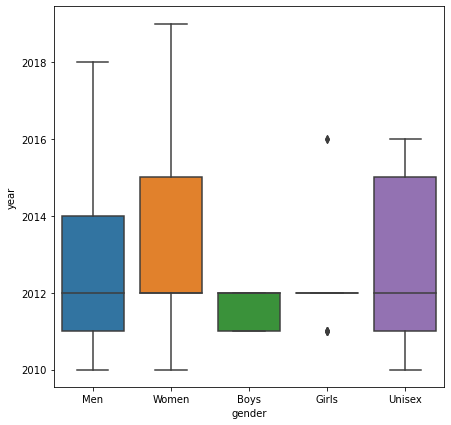

In [51]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='gender', y='year',data=dataset)

Scatterplot graph between Gender and Clothing category

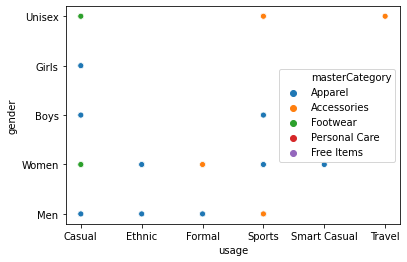

In [56]:
sns.scatterplot(dataset['usage'], dataset['gender'], hue = dataset['masterCategory'])

# Association Rule - Apriori 
Training association rule models (Apriori and ECLAT) to find the most related items bought by customers of a french supermarket during a week. All 7501 lines of the dataset represent items bought by an unique customer, during this week.

This algorithm associate products preferences by most of the customers and can be used to generate products recommendation and help on displaying products strategy.

In [59]:
# Adding all customers into a list of lists
transactions = []
for i in range(0, len(dataset)):
    transactions.append([str(dataset.values[i,j]) for j in range(1,4)])

In [61]:
transactions

[['Men', 'Apparel', 'Topwear'],
 ['Men', 'Apparel', 'Bottomwear'],
 ['Women', 'Accessories', 'Watches'],
 ['Men', 'Apparel', 'Bottomwear'],
 ['Men', 'Apparel', 'Topwear'],
 ['Men', 'Apparel', 'Topwear'],
 ['Men', 'Apparel', 'Topwear'],
 ['Women', 'Apparel', 'Topwear'],
 ['Men', 'Accessories', 'Socks'],
 ['Men', 'Accessories', 'Watches'],
 ['Men', 'Footwear', 'Shoes'],
 ['Women', 'Accessories', 'Belts'],
 ['Men', 'Footwear', 'Flip Flops'],
 ['Women', 'Accessories', 'Bags'],
 ['Boys', 'Footwear', 'Flip Flops'],
 ['Men', 'Apparel', 'Topwear'],
 ['Men', 'Accessories', 'Watches'],
 ['Girls', 'Apparel', 'Topwear'],
 ['Women', 'Apparel', 'Innerwear'],
 ['Women', 'Accessories', 'Bags'],
 ['Men', 'Accessories', 'Watches'],
 ['Men', 'Footwear', 'Sandal'],
 ['Unisex', 'Accessories', 'Shoe Accessories'],
 ['Men', 'Apparel', 'Topwear'],
 ['Men', 'Personal Care', 'Fragrance'],
 ['Men', 'Footwear', 'Shoes'],
 ['Women', 'Accessories', 'Jewellery'],
 ['Men', 'Apparel', 'Topwear'],
 ['Women', 'Personal 

In [62]:
dataset.head(20)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [63]:
# Inspecting elements
transactions[:10]

[['Men', 'Apparel', 'Topwear'],
 ['Men', 'Apparel', 'Bottomwear'],
 ['Women', 'Accessories', 'Watches'],
 ['Men', 'Apparel', 'Bottomwear'],
 ['Men', 'Apparel', 'Topwear'],
 ['Men', 'Apparel', 'Topwear'],
 ['Men', 'Apparel', 'Topwear'],
 ['Women', 'Apparel', 'Topwear'],
 ['Men', 'Accessories', 'Socks'],
 ['Men', 'Accessories', 'Watches']]

In [64]:
# Training Apriori on the dataset
# The hyperparameters choosen on this training are:
# min_support = items bought more than 3 times a day * 7 days (week) / 7500 customers = 0.0028
# min_confidence: at least 20%, min_lift = minimum of 3 (less than that is too low)
# min_length: we want at least 2 items to be associated. No point in having a single item in the result

from apyori import apriori
rules = apriori(transactions, min_support = 0.002, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [65]:
# Visualising the results
results = list(rules)

In [66]:
results

[RelationRecord(items=frozenset({'Accessories', 'Bags'}), support=0.0765, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Accessories'}), items_add=frozenset({'Bags'}), confidence=0.2892249527410208, lift=3.7807183364839316), OrderedStatistic(items_base=frozenset({'Bags'}), items_add=frozenset({'Accessories'}), confidence=1.0, lift=3.7807183364839316)]),
 RelationRecord(items=frozenset({'Accessories', 'Belts'}), support=0.021, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Belts'}), items_add=frozenset({'Accessories'}), confidence=1.0, lift=3.7807183364839316)]),
 RelationRecord(items=frozenset({'Accessories', 'Eyewear'}), support=0.0185, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Eyewear'}), items_add=frozenset({'Accessories'}), confidence=1.0, lift=3.7807183364839316)]),
 RelationRecord(items=frozenset({'Headwear', 'Accessories'}), support=0.0075, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Headwear'}), items_add=frozenset({'A

In [67]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

# Visualizing results in a dataframe

In [68]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [69]:
# Show top 10 higher lift scores
rank.sort_values('Lift', ascending=False).head(10)

,Association,Lift
55,"[Men, Free Items, Free Gifts]",250
18,"[Free Items, Free Gifts]",250
59,"[Personal Care, Women, Skin Care]",17.2414
17,"[Personal Care, Fragrance]",17.2414
58,"[Nails, Personal Care, Women]",17.2414
57,"[Personal Care, Women, Makeup]",17.2414
56,"[Personal Care, Women, Lips]",17.2414
54,"[Personal Care, Women, Fragrance]",17.2414
53,"[Men, Personal Care, Fragrance]",17.2414
23,"[Personal Care, Skin Care]",17.2414


# ECLAT Implementation¶
This is an implementation of the ECLAT code by hand. It calculate the pairs that have been bought more frequently comparing to other pairs. At the end, we expect to see what is the most common combination of products during the week.

An extension of the code can calculate the three most common combination, 4, and so on

Getting the list of products bought this week by all customers

In [70]:
# Putting all transactions in a single list
itens = []
for i in range(0, len(transactions)):
    itens.extend(transactions[i])

# Finding unique items from transactions and removing nan
uniqueItems = list(set(itens))


In [71]:
uniqueItems

['Nails',
 'Topwear',
 'Unisex',
 'Bags',
 'Eyewear',
 'Skin',
 'Boys',
 'Watches',
 'Water Bottle',
 'Jewellery',
 'Ties',
 'Socks',
 'Men',
 'Bottomwear',
 'Mufflers',
 'Accessories',
 'Beauty Accessories',
 'Saree',
 'Personal Care',
 'Headwear',
 'Flip Flops',
 'Girls',
 'Scarves',
 'Footwear',
 'Innerwear',
 'Dress',
 'Loungewear and Nightwear',
 'Women',
 'Makeup',
 'Free Gifts',
 'Wallets',
 'Shoe Accessories',
 'Skin Care',
 'Belts',
 'Fragrance',
 'Eyes',
 'Shoes',
 'Sandal',
 'Apparel',
 'Apparel Set',
 'Free Items',
 'Lips']

# Creating combinations with the items - pairs

In [72]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1; 

In [73]:
pair

[['Nails', 'Topwear'],
 ['Nails', 'Unisex'],
 ['Nails', 'Bags'],
 ['Nails', 'Eyewear'],
 ['Nails', 'Skin'],
 ['Nails', 'Boys'],
 ['Nails', 'Watches'],
 ['Nails', 'Water Bottle'],
 ['Nails', 'Jewellery'],
 ['Nails', 'Ties'],
 ['Nails', 'Socks'],
 ['Nails', 'Men'],
 ['Nails', 'Bottomwear'],
 ['Nails', 'Mufflers'],
 ['Nails', 'Accessories'],
 ['Nails', 'Beauty Accessories'],
 ['Nails', 'Saree'],
 ['Nails', 'Personal Care'],
 ['Nails', 'Headwear'],
 ['Nails', 'Flip Flops'],
 ['Nails', 'Girls'],
 ['Nails', 'Scarves'],
 ['Nails', 'Footwear'],
 ['Nails', 'Innerwear'],
 ['Nails', 'Dress'],
 ['Nails', 'Loungewear and Nightwear'],
 ['Nails', 'Women'],
 ['Nails', 'Makeup'],
 ['Nails', 'Free Gifts'],
 ['Nails', 'Wallets'],
 ['Nails', 'Shoe Accessories'],
 ['Nails', 'Skin Care'],
 ['Nails', 'Belts'],
 ['Nails', 'Fragrance'],
 ['Nails', 'Eyes'],
 ['Nails', 'Shoes'],
 ['Nails', 'Sandal'],
 ['Nails', 'Apparel'],
 ['Nails', 'Apparel Set'],
 ['Nails', 'Free Items'],
 ['Nails', 'Lips'],
 ['Topwear', 'Uni

Calculating score
The calculation is done looking at the number of customers that bought both items (the pair) and divided by all customers of the week (7501). This calculation is done for all pairs possible and the score is returned on "score" list.

𝑠𝑐𝑜𝑟𝑒=number of lists that contain [item x and item y]number of all lists

In [74]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score.append(len(eval(mycode))/7501.)

Wall time: 219 ms


# Showing results¶
Top 10 Most common pairs of items of this week

In [75]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

In [76]:
ranking_ECLAT.sort_values('Score', ascending=False).head(10)

,Pair,Score
77,"[Topwear, Apparel]",0.0865218
451,"[Men, Apparel]",0.0611918
766,"[Women, Apparel]",0.0515931
51,"[Topwear, Men]",0.0479936
702,"[Footwear, Shoes]",0.0449273
436,"[Men, Footwear]",0.0373284
66,"[Topwear, Women]",0.0326623
521,"[Accessories, Women]",0.0323957
428,"[Men, Accessories]",0.0283962
449,"[Men, Shoes]",0.027863


# What if we do that for trios?

In [77]:
# Creating trios
trio = []
for j in range(0, len(uniqueItems)):
    for k in range(j, len(uniqueItems)):
        for l in range(k, len(uniqueItems)):
            if (k != j) and (j != l) and (k != l):
                try:
                    trio.append([uniqueItems[j], uniqueItems[j+k], uniqueItems[j+l]])
                except IndexError:
                    pass 

In [78]:
trio[:5]

[['Nails', 'Topwear', 'Unisex'],
 ['Nails', 'Topwear', 'Bags'],
 ['Nails', 'Topwear', 'Eyewear'],
 ['Nails', 'Topwear', 'Skin'],
 ['Nails', 'Topwear', 'Boys']]

In [79]:
%%time
score_trio = []
for i in trio:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score_trio.append(len(eval(mycode))/7501.)

Wall time: 1.39 s


In [80]:
ranking_ECLAT_trio = pd.DataFrame([trio, score_trio]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=False).head(10)

,Trio,Score
1151,"[Topwear, Men, Apparel]",0.0479936
1466,"[Topwear, Women, Apparel]",0.0326623
2482,"[Bags, Accessories, Women]",0.014798
5652,"[Bottomwear, Women, Apparel]",0.00666578
4232,"[Watches, Accessories, Women]",0.00413278
2917,"[Eyewear, Men, Accessories]",0.00333289
962,"[Topwear, Boys, Apparel]",0.00333289
1367,"[Topwear, Girls, Apparel]",0.00186642
2068,"[Unisex, Footwear, Shoes]",0.00146647
3010,"[Eyewear, Accessories, Women]",0.00106652


# Resulting rules:-

In Apriori Algorithm after comparing top 10 rules generated we come to conclusion that most liked Men, Free Items, Free Gifts.
We can also conclude that these types of clothes with such genre are liked by mostly all age groups and genders. We can also conclude that people who purchase clothes usually get free items and free gifts.

In ECLAT Algorithm after comparing top 10 rules generated we come to conclusion that most liked category are topwear men and apparel